## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv', 
                 parse_dates = [0])

In [3]:
print('shape:', data.shape)

shape: (1000, 21)


In [4]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [5]:
data.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [6]:
nans = data.isnull().sum()
nans

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [7]:
print((np.sum(np.array(nans)) == 0) * 'Нет пропусков', (np.sum(np.array(nans)) != 0) * 'Есть пропуски')

Нет пропусков 


 Выведем уникальные значения для всех не количественных признаков, чтобы решить, к каким они относятся

In [8]:
headers =  data.columns.values.tolist()
headers.remove('duration')
headers.remove('amount')
headers.remove('age')

for i in range(len(headers)):
    print(headers[i], ':', '\n', sep = '') 
    for q in data[headers[i]].unique():
        print('\t', '•' ,  q, '\n')


status:

	 • no checking account 

	 • ... < 0 DM 

	 • ... >= 200 DM / salary for at least 1 year 

	 • 0<= ... < 200 DM 

credit_history:

	 • all credits at this bank paid back duly 

	 • no credits taken/all credits paid back duly 

	 • existing credits paid back duly till now 

	 • delay in paying off in the past 

	 • critical account/other credits elsewhere 

purpose:

	 • car (used) 

	 • others 

	 • retraining 

	 • furniture/equipment 

	 • car (new) 

	 • business 

	 • domestic appliances 

	 • radio/television 

	 • repairs 

	 • vacation 

savings:

	 • unknown/no savings account 

	 • ... <  100 DM 

	 • 100 <= ... <  500 DM 

	 • ... >= 1000 DM 

	 • 500 <= ... < 1000 DM 

employment_duration:

	 • < 1 yr 

	 • 1 <= ... < 4 yrs 

	 • 4 <= ... < 7 yrs 

	 • unemployed 

	 • >= 7 yrs 

installment_rate:

	 • < 20 

	 • 25 <= ... < 35 

	 • 20 <= ... < 25 

	 • >= 35 

personal_status_sex:

	 • female : non-single or male : single 

	 • male : married/widowed 

	 • female

#### Разделение признаков
'status' - порядковый признак, интервальная шкала

'duration'  - количественный признак

 'credit_history' - можно назвать порядковым, так как кредитная история представляется шкалой от самого позитивного (no credits taken/all credits paid back duly) до негативного (critical account/other credits elsewhere), но это спорно
 
 'purpose' - категориальный признак
 
 'amount'  - количественный признак 
 
 'savings' - тоже похоже на порядковый, если за ноль считать ('unknown/no savings account')
 
 'employment_duration' - тоже порядковый,  интервальная шкала
 
 'installment_rate' - тоже порядковый, интервальная шкала
 
 'personal_status_sex' - категориальный
 
 'other_debtors'  - категориальный 
 
 'present_residence' - порядковый, интервальная шкала
 
 'property' - категориальный признак, с большой натяжкой мог бы быть порядковым, если бы мы проранжировали собственность (а-ля машина < дом)
 
 'age' - количественный 
 
 'other_installment_plans' - категориальный
 
 'housing' - категориальный 
 
 'number_credits' - порядковый, интервальная шкала
 
 'job' - порядковый признак, тут уже очевиднее
 
 'people_liable' - бинарный 
 
 'telephone' - бинарный
 
 'foreign_worker' - бинарный
 
 'credit_risk' - бинарный

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [9]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [10]:
print('% клиентов моложе 30, снимающих жилье: ', 
      data[data['age'] < 30]['housing'].value_counts()['rent'] /
      data[data['age'] < 30].shape[0] *100)
print()
print('% клиентов старше 40, снимающих жилье: ', 
      data[data['age'] > 40]['housing'].value_counts()['rent'] /
      data[data['age'] > 40].shape[0] *100)

% клиентов моложе 30, снимающих жилье:  66.66666666666666

% клиентов старше 40, снимающих жилье:  68.01470588235294


### Задание 5 (0.5 балла)

У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [11]:
print('У', data[data['number_credits'].isin(['4-5','>= 6'])]['foreign_worker'].value_counts()['yes'],
      'foreign_worker кредитов больше 3')
      

У 1 foreign_worker кредитов больше 3


### Задание 6 (1 балл)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

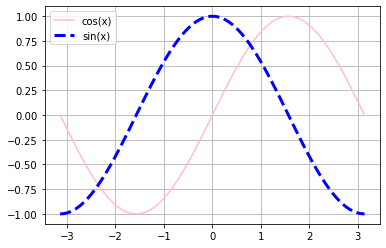

In [13]:
x = np.linspace(-np.pi, np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots()

ax.plot(x, y1, color='pink', label='cos(x)')
ax.plot(x, y2, color='blue', 
         linestyle='dashed', linewidth=3, label='sin(x)')


plt.legend(fontsize=10, loc='upper left')
ax.grid()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

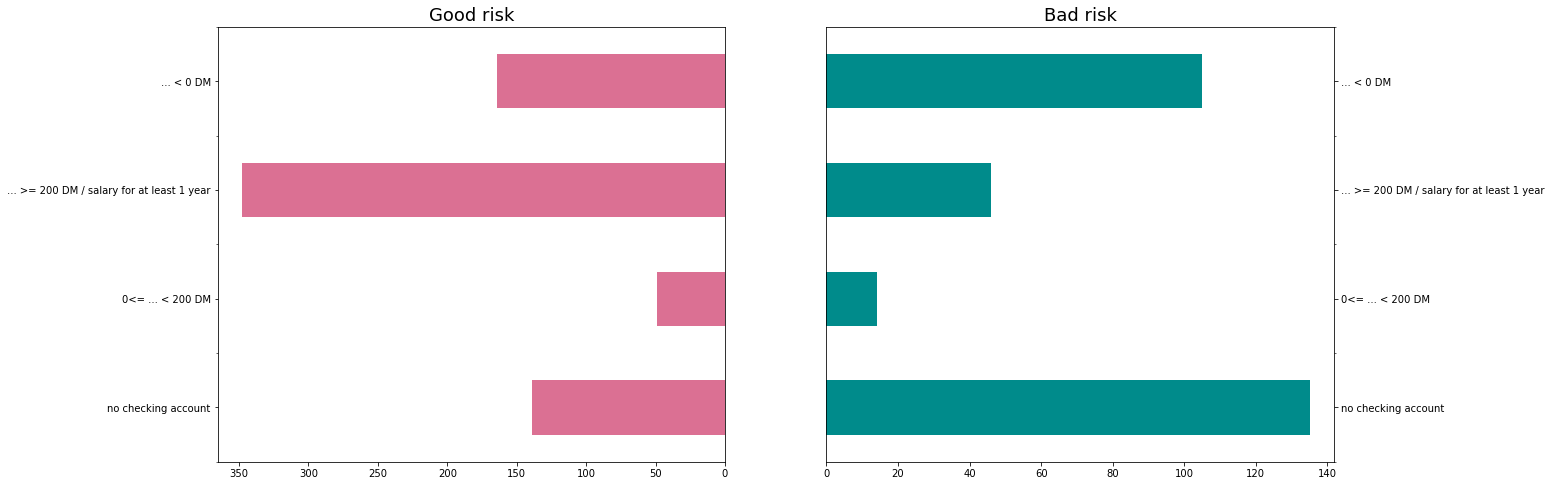

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8), sharey = True)

credit_good = data[data.credit_risk=='good'].groupby('status').credit_risk.count().sort_index(ascending=False)
credit_good.plot(kind='barh', ax=ax[0], color='#DB7093')
ax[0].set_title('Good risk', fontsize=18)
ax[0].invert_xaxis()
ax[0].set(ylabel = '')

credit_bad = data[data.credit_risk=='bad'].groupby('status').credit_risk.count().sort_index(ascending=False)
credit_bad.plot(kind='barh', ax=ax[1], color='#008B8B')
ax[1].set_title('Bad risk', fontsize=18)
ax[1].yaxis.set_ticks_position('right')


### Задание 8  (0.5 балла)

In [15]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

<AxesSubplot:xlabel='savings', ylabel='count'>

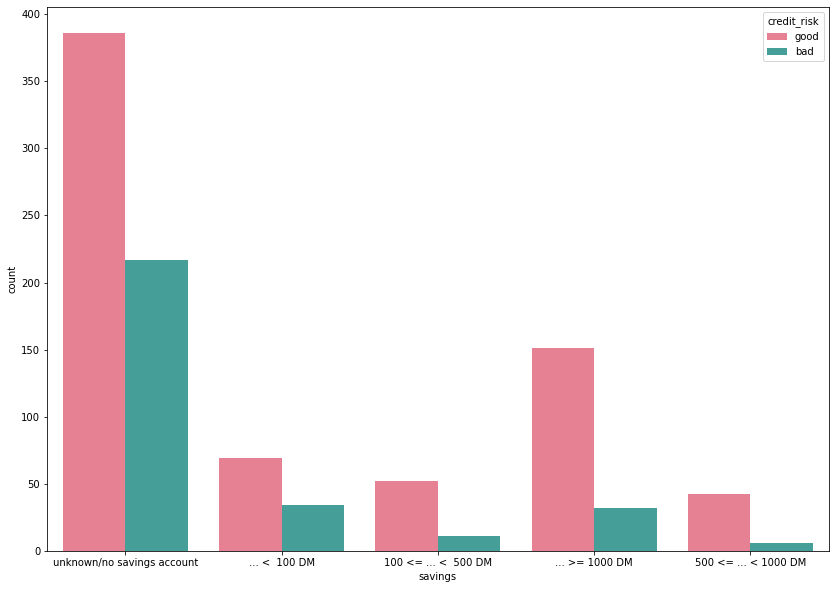

In [16]:
plt.figure(figsize = (14, 10))
sns.countplot(x = 'savings', hue = 'credit_risk',  data = data, palette = 'husl')

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

<AxesSubplot:xlabel='savings', ylabel='age'>

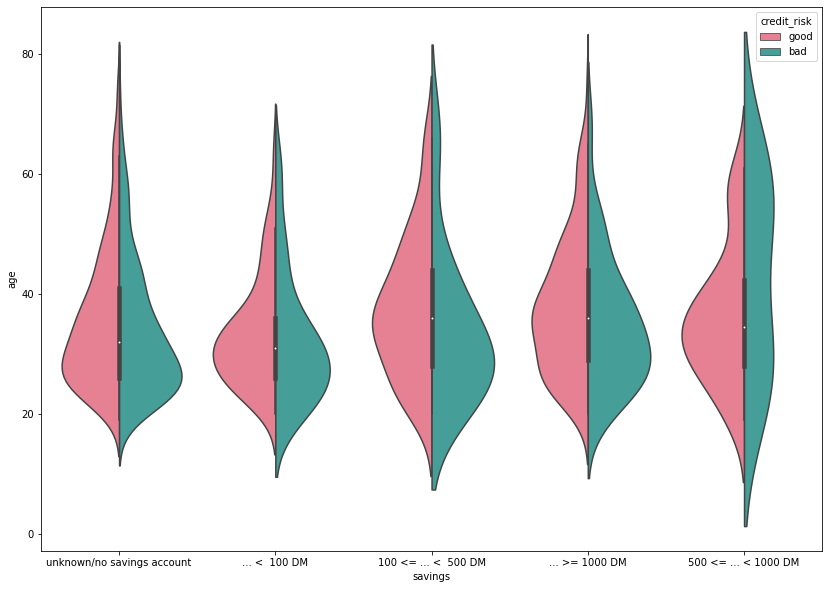

In [17]:
plt.figure(figsize = (14, 10))
sns.violinplot(x = 'savings', y = 'age', hue = 'credit_risk', data = data,  palette = 'husl', split = True)

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

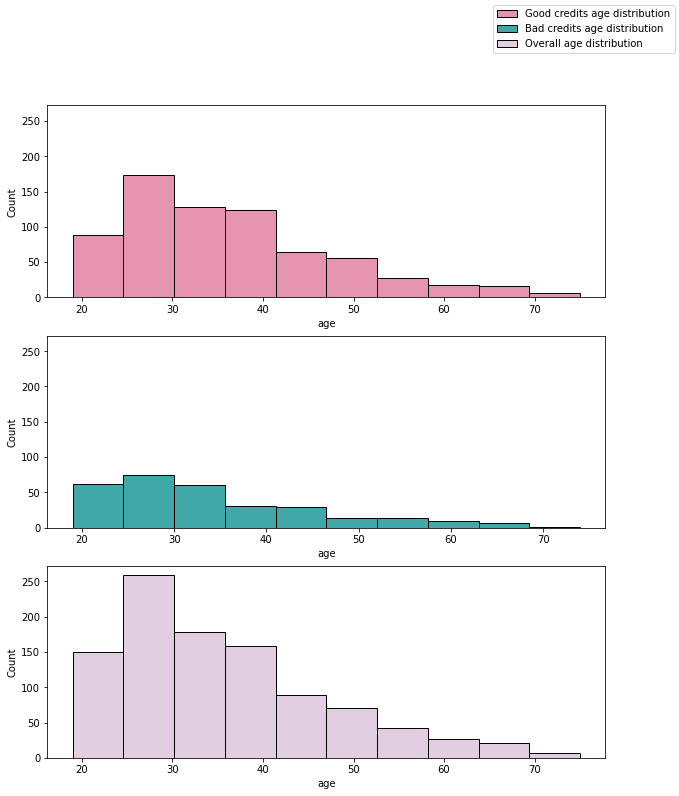

In [18]:
fig, ax = plt.subplots(3, 1, figsize=(10,12), sharey = True)

sns.histplot(x = data[data['credit_risk'] == 'good']['age'], bins = 10, data = data, color = '#DB7093', ax=ax[0])
sns.histplot(x = data[data['credit_risk'] == 'bad']['age'], bins = 10, data = data, color = '#008B8B', ax=ax[1])
sns.histplot(x = data['age'], data = data, color = '#D8BFD8', bins = 10, ax=ax[2])

fig.legend(labels = ['Good credits age distribution', 'Bad credits age distribution', 'Overall age distribution'])

In [19]:
# your code here

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

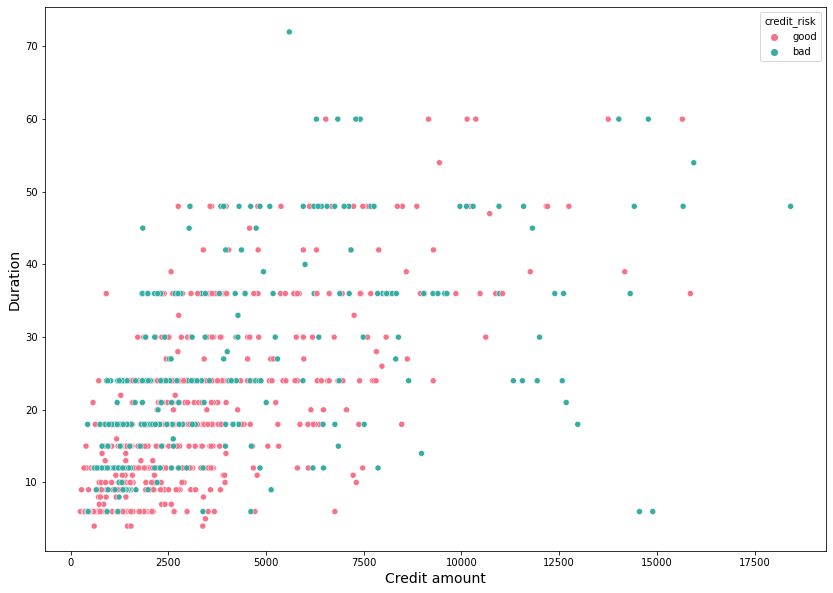

In [20]:
plt.figure(figsize = (14, 10))

scatter = sns.scatterplot('amount', 'duration', hue = 'credit_risk', data=data, palette = 'husl')

scatter.set_xlabel('Credit amount', fontsize=14)
scatter.set_ylabel('Duration', fontsize=14);

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

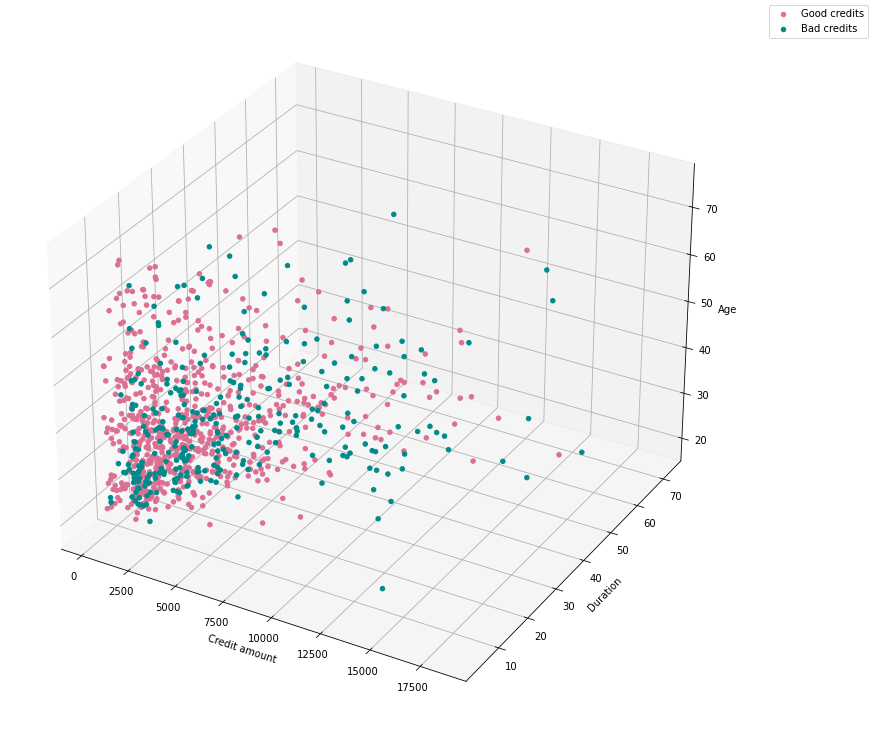

In [21]:
fig = plt.figure(figsize = (14, 10))
ax = Axes3D(fig)

ax.scatter(
    data.amount[data['credit_risk'] == 'good'],
    data.duration[data['credit_risk'] == 'good'],
    data.age[data['credit_risk'] == 'good'],
    alpha=1, 
    color = '#DB7093'
)

ax.scatter(
    data.amount[data['credit_risk'] == 'bad'],
    data.duration[data['credit_risk'] == 'bad'],
    data.age[data['credit_risk'] == 'bad'],
    alpha=1, 
    color = '#008B8B'
)
           
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

fig.legend(labels = ['Good credits', 'Bad credits'])

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [22]:
data = data.drop(['purpose',  'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 
          'housing', 'credit_history'], axis = 1)

In [23]:
#можно было закодировать полегче энкодером, но я хочу сохранить порядок в шкалалах
coded_col = {'status':     {'no checking account': 0, '... < 0 DM' : 1, '0<= ... < 200 DM': 2, 
            '... >= 200 DM / salary for at least 1 year': 3},
             
            'savings': {'unknown/no savings account': 0, '... <  100 DM': 1, '100 <= ... <  500 DM': 2,
                        '500 <= ... < 1000 DM': 3, '... >= 1000 DM': 4}, 
             
            'employment_duration': {'unemployed': 0, '< 1 yr': 1, '1 <= ... < 4 yrs': 2,
                        '4 <= ... < 7 yrs': 3, '>= 7 yrs': 4}, 
             
            'installment_rate': {'>= 35': 0, '25 <= ... < 35': 1, '20 <= ... < 25': 2,
                        '< 20': 3 },
             
            'present_residence': {'< 1 yr': 0, '1 <= ... < 4 yrs': 1, '4 <= ... < 7 yrs': 2,
                        '>= 7 yrs': 3 },
             
            'number_credits': {'>= 6': 0, '4-5': 1, '2-3': 2,
                        '1': 3 },
             
             'job': {'unemployed/unskilled - non-resident': 0, 'unskilled - resident': 1,
                     'skilled employee/official': 2, 'manager/self-empl./highly qualif. employee': 3 },
             
             'telephone': {'no': 0, 'yes (under customer name)': 1} , 
             
             'people_liable': {'0 to 2': 0, '3 or more': 1 },
                               
            'foreign_worker': {'no': 1, 'yes': 0}, 
             
             'credit_risk': {'bad': 0, 'good': 1}
            }
data = data.replace(coded_col)
data.head()

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,18,1049,0,1,3,3,21,3,2,0,0,1,1
1,0,9,2799,0,2,1,1,36,2,2,1,0,1,1
2,1,12,841,1,3,1,3,23,3,1,0,0,1,1
3,0,12,2122,0,2,2,1,39,2,1,1,0,0,1
4,0,12,2171,0,2,3,3,38,2,1,0,0,0,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [48]:
def predict(Xtest: np.array) -> np.array:
    Xtest = ((Xtest - np.min(Xtest, axis = 0))/(np.max(Xtest, axis = 0) - np.min(Xtest, axis = 0)))**0.04 #вы не понимаете это гиперпараметр
    return np.round(np.mean(Xtest, axis = 1))

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

accuracy_score(y_test, predict(X_test))

0.668